<hr>
# PART 1 - DATA WRANGLING

In [18]:
# IMPORT PACKAGES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [19]:
# GETTING PLAYLISTS FROM READ_EXCEL
liked = pd.read_excel('LIKES.xlsx')
disliked = pd.read_excel('DISLIKES.xlsx')
tophits = pd.read_excel('TOP_HITS.xlsx')

# DROP NULL VALUES
liked = liked.dropna().reset_index(drop=True)
disliked = disliked.dropna().reset_index(drop=True)
tophits = tophits.dropna().reset_index(drop=True)

# CHANGE COLUMN NAME FROM 'POP.' TO 'POPULARITY'
liked = liked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
disliked = disliked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
tophits = tophits.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))

# ADD 'YEAR' COLUMN FROM 'RELEASE' COLUMN & CONVERT OBJECT TYPE TO NUMERIC TYPE
liked['YEAR'] = liked['RELEASE'].astype(str).str[0:4]
liked['YEAR'] = liked['YEAR'].convert_objects(convert_numeric=True)
disliked['YEAR'] = disliked['RELEASE'].astype(str).str[0:4]
disliked['YEAR'] = disliked['YEAR'].convert_objects(convert_numeric=True)
tophits['YEAR'] = tophits['RELEASE'].astype(str).str[0:4]
tophits['YEAR'] = tophits['YEAR'].convert_objects(convert_numeric=True)

# DROP 'RELEASE' COLUMN
liked = liked.drop('RELEASE', 1)
disliked = disliked.drop('RELEASE', 1)
tophits = tophits.drop('RELEASE', 1)

/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [20]:
liked.head()

,TITLE,ARTIST,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POPULARITY,YEAR
0,Where Is My Mind?,Pixies,81.0,44.0,51.0,-14.0,24.0,03:49:00,1.0,35.0,2004
1,Give Me Nurture,rei brown,97.0,34.0,65.0,-5.0,7.0,01:29:00,88.0,33.0,2016
2,Lullaby,Atlas Bound,73.0,38.0,73.0,-9.0,17.0,03:40:00,38.0,56.0,2016
3,Warm On A Cold Night,HONNE,83.0,61.0,34.0,-6.0,39.0,04:22:00,19.0,63.0,2016
4,Release You,Tom Misch,120.0,36.0,54.0,-13.0,20.0,03:53:00,33.0,53.0,2014


<hr>
# PART 2 - DATA STORYTELLING
<b>
1. What type of songs do I listen to?
2. How do my liked songs compare to my disliked songs?
3. How do my liked songs compare to today's top hits?</b>

# 1. 'My Ideal Song' - Low Energy, Not So Positive, Highly Acoustic 

<b>Looking at the mean distributions of the three playlists below, I can see that I listen to songs that are relatively low in energy, low in valence (positivity), highly acoustic, and are not so loud.</b>

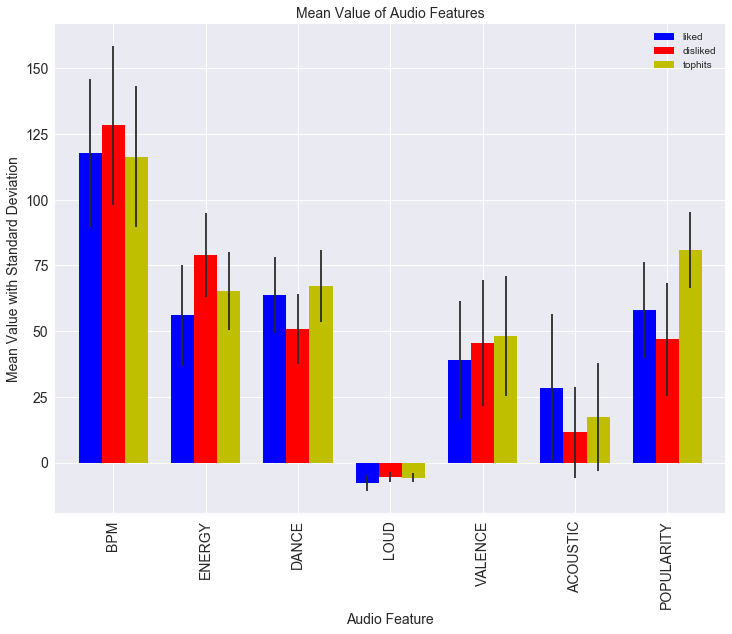

In [21]:
# GET DESCRIBE VALUES
d1 = liked.describe()
d2 = disliked.describe()
d3 = tophits.describe()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']
 
# SET WIDTH AND HEIGHT
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

# GROUPED BAR PLOTS
avgs = pd.concat([d1.iloc[1,:7].rename('liked'), 
                  d2.iloc[1,:7].rename('disliked'), 
                  d3.iloc[1,:7].rename('tophits')], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[d1.iloc[2,:7], 
                                                                       d2.iloc[2,:7], 
                                                                       d3.iloc[2,:7]],
                                                                 color=['b','r','y'])

# SET TITLE AND LABELS
avgs.set_title('Mean Value of Audio Features', fontsize=14)
avgs.set_xlabel('Audio Feature', fontsize=14)
avgs.set_ylabel('Mean Value with Standard Deviation', fontsize=14)

plt.show()

# 2. Comparing Liked and Disliked Playlists
<b>I seem to dislike songs that are high in energy, loud, non-acoustic, and are not danceable to.</b>

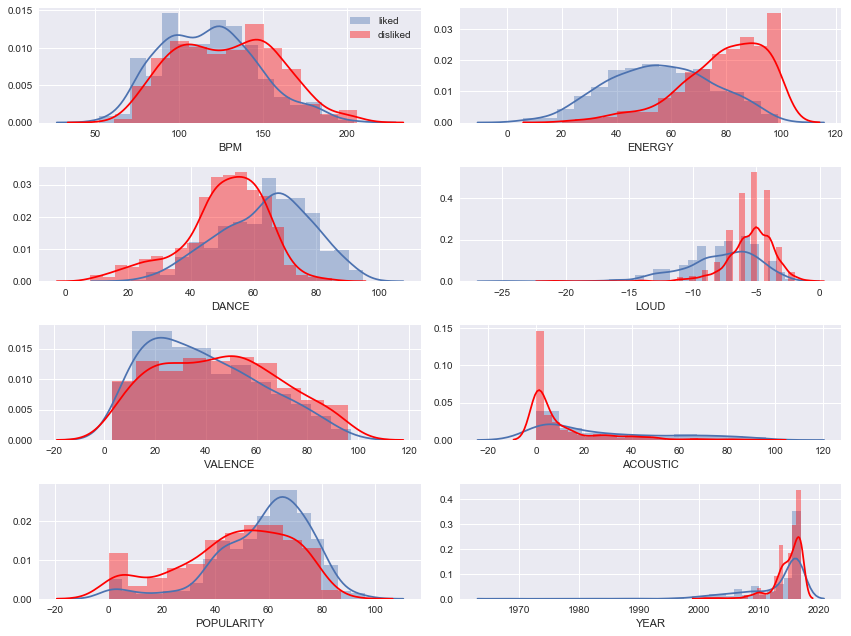

In [22]:
# USE SEABORN'S DISTRIBUTION PLOT
plt.subplot(421)
sns.distplot(liked.BPM, label='liked')
sns.distplot(disliked.BPM, color='r', label='disliked')
plt.xlabel('BPM')
plt.legend()

plt.subplot(422)
sns.distplot(liked.ENERGY)
sns.distplot(disliked.ENERGY, color='r')
plt.xlabel('ENERGY')

plt.subplot(423)
sns.distplot(liked.DANCE)
sns.distplot(disliked.DANCE, color='r')
plt.xlabel('DANCE')

plt.subplot(424)
sns.distplot(liked.LOUD)
sns.distplot(disliked.LOUD, color='r')
plt.xlabel('LOUD')

plt.subplot(425)
sns.distplot(liked.VALENCE)
sns.distplot(disliked.VALENCE, color='r')
plt.xlabel('VALENCE')

plt.subplot(426)
sns.distplot(liked.ACOUSTIC)
sns.distplot(disliked.ACOUSTIC, color='r')
plt.xlabel('ACOUSTIC')

plt.subplot(427)
sns.distplot(liked.POPULARITY)
sns.distplot(disliked.POPULARITY, color='r')
plt.xlabel('POPULARITY')

plt.subplot(428)
sns.distplot(liked.YEAR)
sns.distplot(disliked.YEAR, color='r')
plt.xlabel('YEAR')

plt.tight_layout()
plt.show()


# 3. Comparing Liked and Today's Top Hits Playlists
<b>Energy, loudness, and valence are relatively higher in today's top hits songs. And of course popularity is higher and release year is more recent for today's top hits.</b>

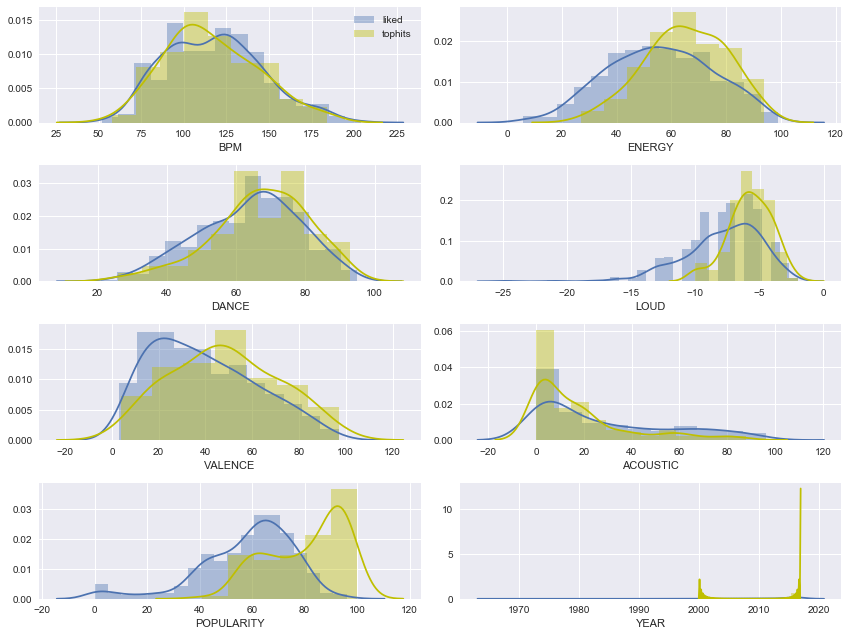

In [23]:
plt.subplot(421)
sns.distplot(liked.BPM, label='liked')
sns.distplot(tophits.BPM, color='y', label='tophits')
plt.xlabel('BPM')
plt.legend()

plt.subplot(422)
sns.distplot(liked.ENERGY)
sns.distplot(tophits.ENERGY, color='y')
plt.xlabel('ENERGY')

plt.subplot(423)
sns.distplot(liked.DANCE)
sns.distplot(tophits.DANCE, color='y')
plt.xlabel('DANCE')

plt.subplot(424)
sns.distplot(liked.LOUD)
sns.distplot(tophits.LOUD, color='y')
plt.xlabel('LOUD')

plt.subplot(425)
sns.distplot(liked.VALENCE)
sns.distplot(tophits.VALENCE, color='y')
plt.xlabel('VALENCE')

plt.subplot(426)
sns.distplot(liked.ACOUSTIC)
sns.distplot(tophits.ACOUSTIC, color='y')
plt.xlabel('ACOUSTIC')

plt.subplot(427)
sns.distplot(liked.POPULARITY)
sns.distplot(tophits.POPULARITY, color='y')
plt.xlabel('POPULARITY')

plt.subplot(428)
sns.distplot(liked.YEAR)
sns.distplot(tophits.YEAR, color='y')
plt.xlabel('YEAR')

plt.tight_layout()
plt.show()
